# Homework 1

Your friend living in Fort Collins tells you that the air pressure is anomalous when there is measurable precipitation (greater than or equal to 0.01 inches). To test your friends’ hypothesis, use hourly observations from Fort Collins in 2014.  The data include both the precipitation amount in units of inches and pressure in units of hPa.  The data file is called homework1_data.csv!

In [2]:
# load in packages
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd  # library for data analysis for text files (everything but netcdf files)
%matplotlib inline

In [4]:
data = pd.read_csv('homework1_data.csv')

In [21]:
data

Index(['P_hPa', 'R_inches'], dtype='object')

## A.
## What was the average pressure in 2014 ($\bar{P}$)?  What was the average pressure when it rained ($\bar{P}$$_{R >= 0.01}$)?  (10 points)!

In [18]:
# Average pressure in 2014

p_avg = np.mean(data['P_hPa'].values)

p_std = np.std(data['P_hPa'].values)

print('The average pressure in 2014 was ' + np.str(np.round(p_avg,2)) + ' hPa')

The average pressure in 2014 was 846.33 hPa


In [31]:
# Average pressure in 2014 when there was precipiation over 0.01 inches

p_precip = data['P_hPa'].where(data['R_inches'] > 0.01, np.NaN).dropna()

p_avg_precip = np.mean(p_precip)

print('The average pressure in 2014 when R > 0.01 inches was ' + np.str(np.round(p_avg_precip,2)) + ' hPa')

The average pressure in 2014 when R > 0.01 inches was 846.82 hPa


## B.

## Test your friends’ hypothesis by generating confidence intervals using both a t-statistic and a z-statistic. Is the average pressure different when it is raining?  What is more appropriate to use as a statistical test – a t- or a z-statistic? Use 95% confidence interval. (15 points)!

In [47]:
# 95% C.I. Using a t-statistic

N = len(p_precip) # number of samples
df = N-1
tstat = stats.t.ppf(0.975,df) # for the 95% C.I.

low_limit_t = p_avg - tstat * (p_std/np.sqrt(N-1))
high_limit_t = p_avg + tstat * (p_std/np.sqrt(N-1))

In [54]:
# 95% C.I. Using a z-statistic

zstat = stats.norm.ppf(0.975)

low_limit_z = p_avg - zstat * (p_std/np.sqrt(N))
high_limit_z = p_avg + zstat * (p_std/np.sqrt(N))

In [83]:
# Results

print("From a t-test, the 95% C.I. range is: " + np.str(np.round(low_limit_t,2)) + '-' + np.str(np.round(high_limit_t,2)) + ' hPa')

print("From a z-test, the 95% C.I. range is: " + np.str(np.round(low_limit_z,2)) + '-' + np.str(np.round(high_limit_z,2)) + ' hPa')

print("Our P value when there is non-negligible precipitation was 846.82 hPa, which is within the 95% C.I. for both a z- and t-test")

print("Thus, there is no relationship between the precipitation and atmospheric pressure.")

From a t-test, the 95% C.I. range is: 845.64-847.03 hPa
From a z-test, the 95% C.I. range is: 845.64-847.02 hPa
Our P value when there is non-negligible precipitation was 846.82 hPa, which is within the 95% C.I. for both a z- and t-test
Thus, there is no relationship between the precipitation and atmospheric pressure.


## C.

## Instead of the t/z-test – use bootstrap sampling to determine whether the local pressure is anomalously high during times when it is raining. How does your answer compare with your results using the t/z-test? (15 points)!

In [59]:
# Bootstrap

bootstraps = 1000

# initialize array
P_Bootstrap=np.empty((bootstraps,N))

## loop over to fill in array with randomly selected values
for ii in range(bootstraps):
    P_Bootstrap[ii,:]=np.random.choice(data['P_hPa'].values,N)

In [62]:
P_Bootstrap.shape

(1000, 254)

In [66]:
bootstrap_avg = P_Bootstrap.mean(axis=1)

In [67]:
bootstrap_avg.shape

(1000,)

In [72]:
# Get statistics from the Bootstrap

P_Bootstrap_mean_avg=np.mean(bootstrap_avg)
print("Bootstrap Averages: " + np.str(np.round(P_Bootstrap_mean_avg,2)))
P_Bootstrap_mean_std=np.std(bootstrap_avg)
print("Bootstrap Std: " + np.str(np.round(P_Bootstrap_mean_std,2)))
P_Bootstrap_mean_min=np.min(bootstrap_avg)
print("Bootstrap Minimum: " + np.str(np.round(P_Bootstrap_mean_min,2)))
P_Bootstrap_mean_max=np.max(bootstrap_avg)
print("Bootstrap Maximum: " + np.str(np.round(P_Bootstrap_mean_max,2)))

Bootstrap Averages: 846.32
Bootstrap Std: 0.35
Bootstrap Minimum: 845.11
Bootstrap Maximum: 847.61


Text(0.5, 1.0, 'Bootstrapped random values for Pressure')

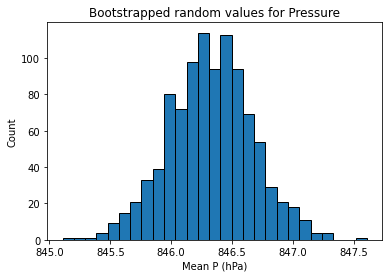

In [84]:
# Generate a distribution of the bootstrap
binsize=0.1
min4hist=np.round(np.min(bootstrap_avg),1)-binsize
max4hist=np.round(np.max(bootstrap_avg),1)+binsize
nbins=int((max4hist-min4hist)/binsize)


plt.hist(bootstrap_avg,nbins,edgecolor='black')
plt.xlabel('Mean P (hPa)')
plt.ylabel('Count')
plt.title('Bootstrapped random values for Pressure')

In [87]:
# 95% C.I.
alpha = 0.05

# Upper should have 97.5%
upper_limit = 1 - alpha/2
CI_up = np.percentile(bootstrap_avg, 100*(upper_limit))

# Lower should have 2.5%
upper_limit = alpha/2
CI_lo = np.percentile(bootstrap_avg, 100*(upper_limit))

print("Confidence Intervals from the Bootstrap Distribution:")
print(CI_lo)
print(CI_up)

Confidence Intervals from the Bootstrap Distribution
845.6274281496063
847.0201545275589


In [90]:
print("Our sample value falls within the range of the bootstrap distribution 95% confidence interval, so we need to reject the hypothesis that they are different!")

Our sample value falls within the range of the bootstrap distribution 95% confidence interval, so we need to reject the hypothesis that they are different!
